In [28]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset
from utils import UID_variance, UID_pairwise

import time
import os
from pathlib import Path

In [36]:
dataset = load_dataset("UniversalCEFR/readme_en", split="train")
dataset = dataset.shuffle(seed=42).select(range(300))

In [37]:
dataset

Dataset({
    features: ['title', 'lang', 'source_name', 'format', 'category', 'cefr_level', 'license', 'text'],
    num_rows: 300
})

In [38]:
data = []
for file in Path('Surprisal_outputs').rglob('*.csv'):
    df = pd.read_csv(file)
    data.append(df)

In [39]:
uid_features = []
for text in data:
    uid_var = UID_variance(text)
    uid_pw = UID_pairwise(text)
    mean_surp = text['surprisal'].mean()
    length = text.shape[0]
    uid_features.append({
        'mean_surprisal': mean_surp,
        'n_tokens': length,
        'uid_variance': uid_var,
        'uid_pairwise': uid_pw
    })
uid_features = pd.DataFrame(uid_features)
uid_features['cefr'] = dataset['cefr_level'][:uid_features.shape[0]]

In [40]:
cefr_mapping = {
    'A1': 1,
    'A2': 2,
    'B1': 3,
    'B2': 4,
    'C1': 5,
    'C2': 6
}
uid_features['cefr_num'] = uid_features['cefr'].map(cefr_mapping)

In [41]:
uid_features

,mean_surprisal,n_tokens,uid_variance,uid_pairwise,cefr,cefr_num
0,5.351597,12,23.429648,50.832353,B1,3
1,7.261798,36,28.090132,47.177057,A2,2
2,6.632438,29,32.767792,55.073267,B1,3
3,6.881256,15,21.523184,41.108715,B2,4
4,4.797576,11,14.966589,47.389580,B1,3
...,...,...,...,...,...,...
277,4.069262,11,10.032592,31.302578,C1,5
278,5.589192,7,13.990441,23.470305,B2,4
279,5.303973,20,11.453751,15.209210,A1,1
280,6.305773,39,19.014873,28.859368,B2,4


In [42]:
uid_features.groupby('cefr').mean()

,mean_surprisal,n_tokens,uid_variance,uid_pairwise,cefr_num
cefr,,,,,
A1,6.168166,22.473684,20.724041,43.175369,1.0
A2,6.384803,23.809524,21.873083,45.462939,2.0
B1,6.324708,22.194030,21.703775,46.231689,3.0
B2,6.180047,23.436782,19.974165,39.953008,4.0
C1,6.108015,25.789474,20.228148,41.788015,5.0
C2,6.256799,21.000000,20.493724,40.070710,6.0


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='cefr_num', ylabel='uid_variance'>

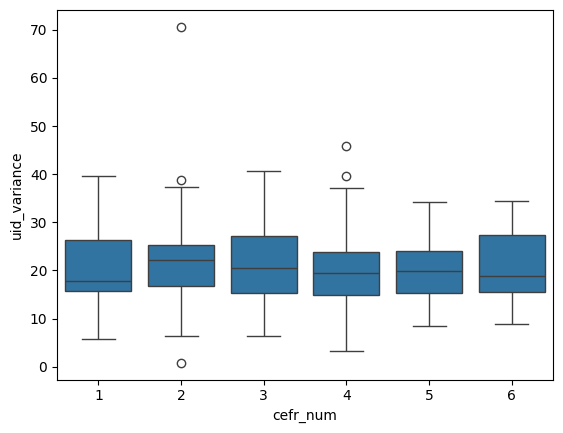

In [44]:
sns.boxplot(uid_features, x='cefr_num', y='uid_variance')

<Axes: xlabel='cefr_num', ylabel='mean_surprisal'>

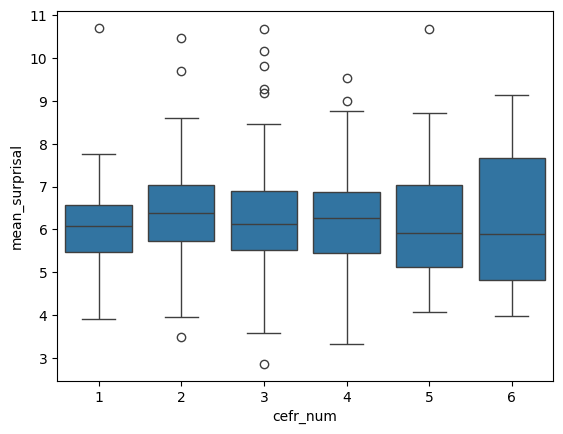

In [45]:
sns.boxplot(uid_features, x='cefr_num', y='mean_surprisal')

In [46]:
uid_features['cefr_num'].value_counts(normalize=True)

cefr_num
4    0.308511
3    0.237589
2    0.223404
5    0.134752
1    0.067376
6    0.028369
Name: proportion, dtype: float64